In [1]:
#肥胖水平数据分析报告：

In [2]:
## 项目背景与目的

#肥胖已成为全球性公共健康问题，据世界卫生组织(WHO)数据显示，全球肥胖率在过去几十年呈现出持续上升趋势。肥胖不仅是一种表面现象，更是多种慢性疾病的风险因素，包括但不限于2型糖尿病、心血管疾病、某些癌症以及关节疾病等。因此，深入理解导致肥胖的各种因素对于制定有效的预防和干预策略至关重要。

#本项目旨在通过对收集的个体数据进行全面分析，探索各种生活方式因素、饮食习惯、人口统计学特征与不同肥胖水平之间的关联性。具体目标包括：

#1. 识别关键影响因素：确定哪些因素（如饮食习惯、身体活动、交通方式等）与肥胖水平有显著相关性
   
#2. 建立预测模型：基于各种特征构建能够准确预测个体肥胖风险的模型
   
#3. 提供针对性建议：根据分析结果，为不同人群提供个性化的肥胖预防和干预建议
   
#4. 促进公共健康决策：为公共健康政策制定者提供数据支持，帮助设计更有效的肥胖预防计划

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 设置中文显示
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
matplotlib.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 设置更美观的可视化风格
plt.style.use('ggplot')

In [5]:
df=pd.read_csv('obesity_level.csv')

In [9]:
df.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [10]:
df.shape

(20758, 18)

In [14]:
# 查看数据类型和缺失值情况
print("\n数据集信息:")
display(df.info())

# 查看数值型数据的统计摘要
print("\n数值型数据统计摘要:")
display(df.describe())

# 查看分类型数据的分布
print("\n分类型数据统计:")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\n{col}的唯一值:")
    display(df[col].value_counts())


数据集信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                     

None


数值型数据统计摘要:


,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,0.819636,0.914443,2.445908,2.761332,0.011803,2.029418,0.033096,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.384500,0.279716,0.533218,0.705375,0.108000,0.608467,0.178891,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,1.000000,1.000000,2.000000,3.000000,0.000000,1.792022,0.000000,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,1.000000,1.000000,2.393837,3.000000,0.000000,2.000000,0.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,1.000000,1.000000,3.000000,3.000000,0.000000,2.549617,0.000000,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,1.000000,1.000000,3.000000,4.000000,1.000000,3.000000,1.000000,3.000000,2.000000



分类型数据统计:

Gender的唯一值:


Gender
Female    10422
Male      10336
Name: count, dtype: int64


CAEC的唯一值:


CAEC
Sometimes     17529
Frequently     2472
Always          478
0               279
Name: count, dtype: int64


CALC的唯一值:


CALC
Sometimes     15066
0              5163
Frequently      529
Name: count, dtype: int64


MTRANS的唯一值:


MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64


0be1dad的唯一值:


0be1dad
Obesity_Type_III       4046
Obesity_Type_II        3248
0rmal_Weight           3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [15]:
df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
0be1dad                           0
dtype: int64

In [18]:
print("目标变量分布")
weight_classes=df.iloc[:,-1].value_counts()
weight_classes

目标变量分布


0be1dad
Obesity_Type_III       4046
Obesity_Type_II        3248
0rmal_Weight           3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [19]:
df['obesity_level']=df.iloc[:,-1].str.replace('0rmal_Weight','Normal_Weight')


In [20]:
df['obesity_level'].value_counts()

obesity_level
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

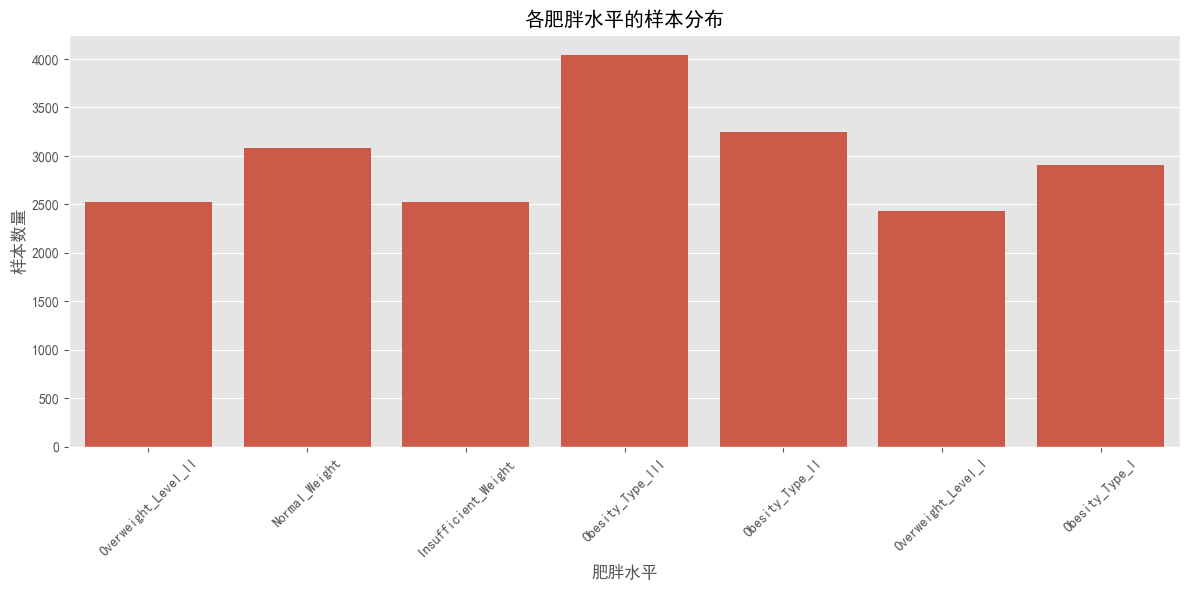

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x='obesity_level',data=df)
plt.title('各肥胖水平的样本分布')
plt.xlabel('肥胖水平')
plt.ylabel('样本数量')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
## 第一步数据加载与初步探索的主要发现

#基于初步数据探索的结果，我们可以总结出以下重要发现：

#1. **数据集规模与完整性**：
#   - 数据集包含20,758条记录和18个特征
#   - 所有列均无缺失值，这是非常理想的数据质量
#   - 数据类型包括：数值型(float64: 8列, int64: 5列)和分类型(object: 5列)

#2. **目标变量分布**：
#   - 数据集中的肥胖水平(Obesity Level)分为7个类别
#   - 各类别分布相对均衡：三级肥胖(Obesity_Type_III)最多(4,046例)，一级超重(Overweight_Level_I)最少(2,427例)
#   - 已修正了"0rmal_Weight"的拼写错误为"Normal_Weight"

#3. **主要分类变量分布**：
#   - 性别(Gender)：女性(10,422)略多于男性(10,336)，分布基本平衡
#   - 饮食习惯(CAEC)：大多数为"有时"(Sometimes, 17,529)
#   - 交通方式(MTRANS)：公共交通使用最为普遍(16,687)，其次是汽车(3,534)和步行(467)

#4. **可视化结果**：
#   - 肥胖水平的分布条形图显示了各类别的样本数量差异
#   - 三级肥胖(Obesity_Type_III)是最常见的类别，其次是二级肥胖(Obesity_Type_II)和正常体重(Normal_Weight)

In [24]:
## 第二步：探索性数据分析(EDA)的目的与必要性

#在完成数据加载和初步探索后，我们需要进行更深入的探索性数据分析，这一步骤至关重要，其目的在于：

### 1. 理解变量之间的关系

#通过分析各特征与肥胖水平之间的关联，我们可以发现哪些因素可能对肥胖有显著影响。例如，我们需要了解不同的生活方式指标(如饮食习惯、运动频率、交通方式)如何与肥胖水平相关联。

### 2. 识别潜在的模式和趋势

#通过各种可视化技术，我们可以发现数据中潜在的模式和趋势，这些发现可能不会在简单的统计摘要中显现。例如，特定年龄段是否有更高的肥胖风险？不同交通方式的人群在体重分布上是否有显著差异？

### 3. 特征工程的基础

#探索性分析将帮助我们确定哪些特征需要转换或创建新的派生特征。例如，我们可以计算BMI(体重指数)作为新特征，并验证其与数据集中的肥胖分类是否一致。

### 4. 数据假设验证

#通过统计检验，我们可以验证数据中的假设，例如家族肥胖史与个人肥胖水平是否显著相关？不同性别在肥胖风险因素上是否存在显著差异？

### 5. 为建模做准备

#探索性分析的结果将直接指导我们的建模策略，包括哪些特征应被包含在模型中，是否需要处理类别不平衡，以及哪种类型的模型可能最适合我们的数据。

In [26]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
matplotlib.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.style.use('ggplot')
df=pd.read_csv('obesity_level.csv')

In [27]:
df['obesity_level']=df.iloc[:,-1].str.replace('ormal_Weight','Normal_Weight')

In [28]:
df['BMI']=df['Weight']/(df['Height']**2)

C:\Users\27514\AppData\Local\Temp\ipykernel_16892\725595626.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='obesity_level', y='BMI', data=df, palette='viridis')


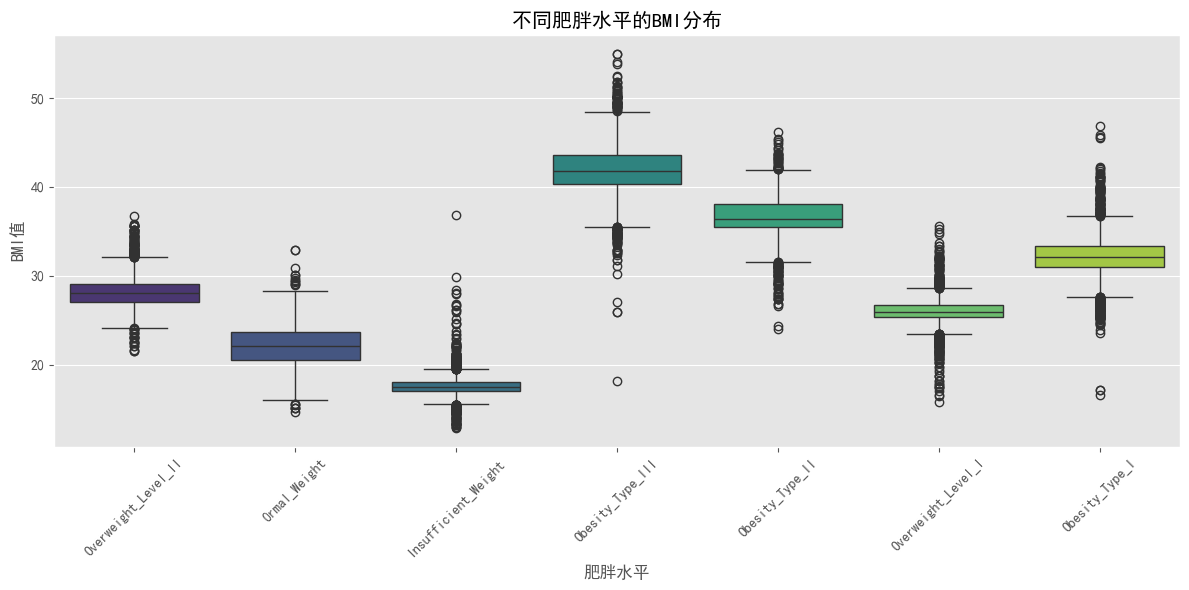

C:\Users\27514\AppData\Local\Temp\ipykernel_16892\725595626.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='obesity_level', y='BMI', data=bmi_by_obesity, palette='viridis')


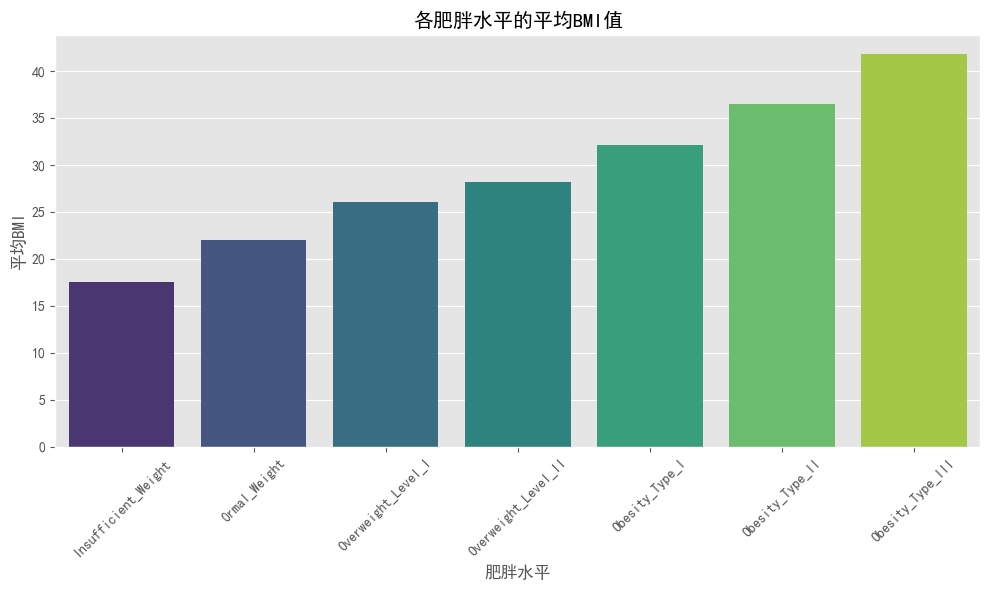

In [30]:
# 根据WHO标准定义BMI分类函数
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    elif bmi < 35:
        return "Obesity Class I"
    elif bmi < 40:
        return "Obesity Class II"
    else:
        return "Obesity Class III"

# 应用BMI分类
df['BMI_Category'] = df['BMI'].apply(bmi_category)
# 可视化BMI与obesity_level的关系
plt.figure(figsize=(12, 6))
sns.boxplot(x='obesity_level', y='BMI', data=df, palette='viridis')
plt.title('不同肥胖水平的BMI分布')
plt.xlabel('肥胖水平')
plt.ylabel('BMI值')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# 计算每个肥胖水平的平均BMI
bmi_by_obesity = df.groupby('obesity_level')['BMI'].mean().sort_values().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='obesity_level', y='BMI', data=bmi_by_obesity, palette='viridis')
plt.title('各肥胖水平的平均BMI值')
plt.xlabel('肥胖水平')
plt.ylabel('平均BMI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# 比较数据集的obesity_level与基于BMI的分类一致性
consistency_table = pd.crosstab(df['obesity_level'], df['BMI_Category'])
print("肥胖水平与BMI分类的一致性:")
display(consistency_table)

肥胖水平与BMI分类的一致性:


BMI_Category,Normal,Obesity Class I,Obesity Class II,Obesity Class III,Overweight,Underweight
obesity_level,,,,,,
0rmal_Weight,2736,5,0,0,158,183
Insufficient_Weight,302,0,1,0,11,2209
Obesity_Type_I,8,2267,233,25,374,3
Obesity_Type_II,2,511,2609,92,34,0
Obesity_Type_III,0,53,853,3136,3,1
Overweight_Level_I,404,46,2,0,1963,12
Overweight_Level_II,74,236,15,0,2197,0


In [32]:
# 2.2分析人口统计学特征与肥胖的关系

<Figure size 1200x600 with 0 Axes>

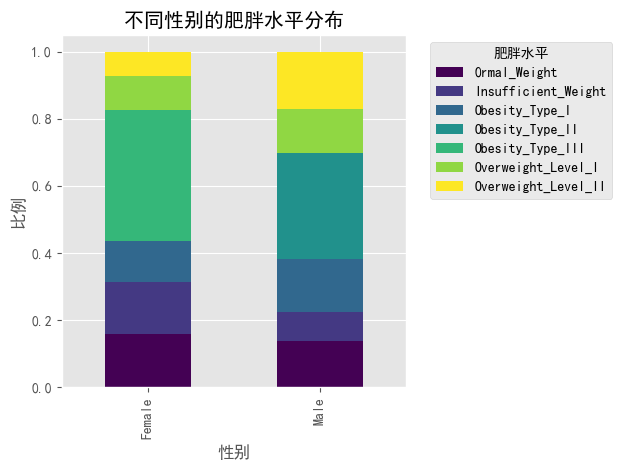

In [33]:
# 性别与肥胖水平的关系
plt.figure(figsize=(12, 6))
gender_obesity = pd.crosstab(df['Gender'], df['obesity_level'], normalize='index')
gender_obesity.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('不同性别的肥胖水平分布')
plt.xlabel('性别')
plt.ylabel('比例')
plt.legend(title='肥胖水平', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

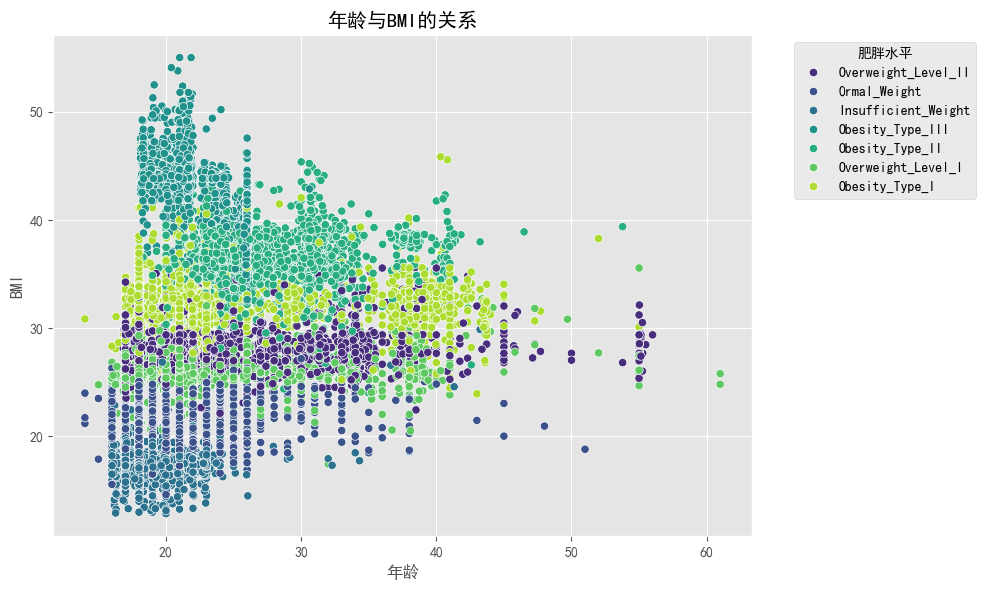

In [35]:
#年龄与BMI的关系
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='BMI',hue='obesity_level',data=df,palette='viridis')
plt.title('年龄与BMI的关系')
plt.xlabel('年龄')
plt.ylabel('BMI')
plt.legend(title='肥胖水平', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Text(0, 0.5, '频率')

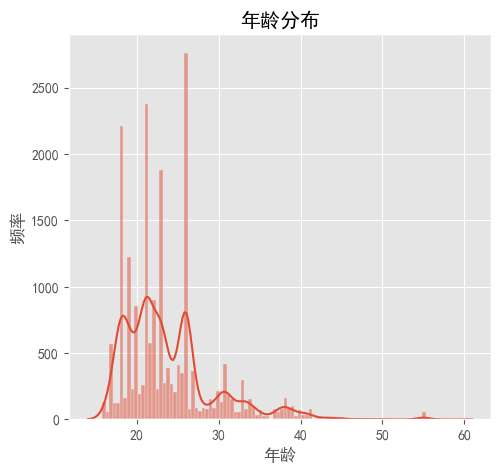

In [36]:
# 年龄分布
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('年龄分布')
plt.xlabel('年龄')
plt.ylabel('频率')

C:\Users\27514\AppData\Local\Temp\ipykernel_16892\4277652699.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='obesity_level', y='Age', data=df, palette='viridis')


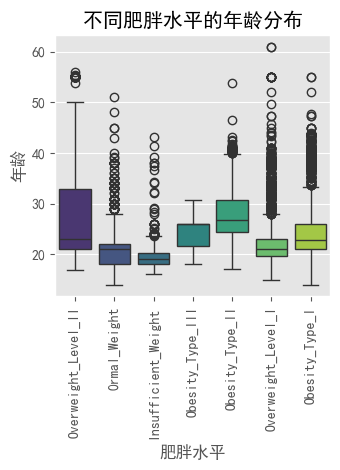

In [37]:
# 不同肥胖水平的年龄分布
plt.subplot(1, 2, 2)
sns.boxplot(x='obesity_level', y='Age', data=df, palette='viridis')
plt.title('不同肥胖水平的年龄分布')
plt.xlabel('肥胖水平')
plt.ylabel('年龄')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [38]:
#分析生活方式因素与肥胖的关系

<Figure size 1200x600 with 0 Axes>

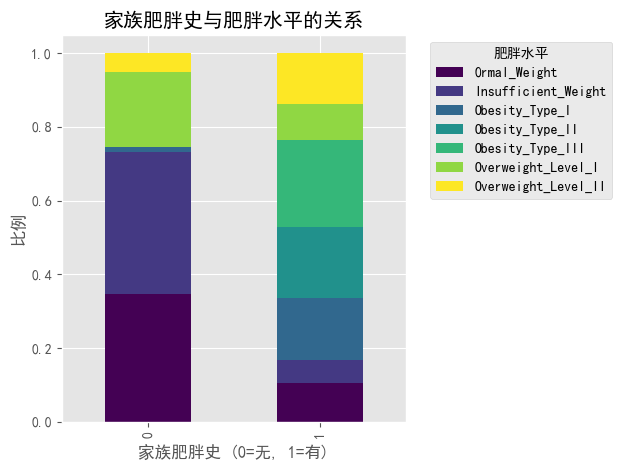

In [39]:
# 家族肥胖史与肥胖水平的关系
plt.figure(figsize=(12, 6))
family_obesity = pd.crosstab(df['family_history_with_overweight'], df['obesity_level'], normalize='index')
family_obesity.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('家族肥胖史与肥胖水平的关系')
plt.xlabel('家族肥胖史 (0=无, 1=有)')
plt.ylabel('比例')
plt.legend(title='肥胖水平', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

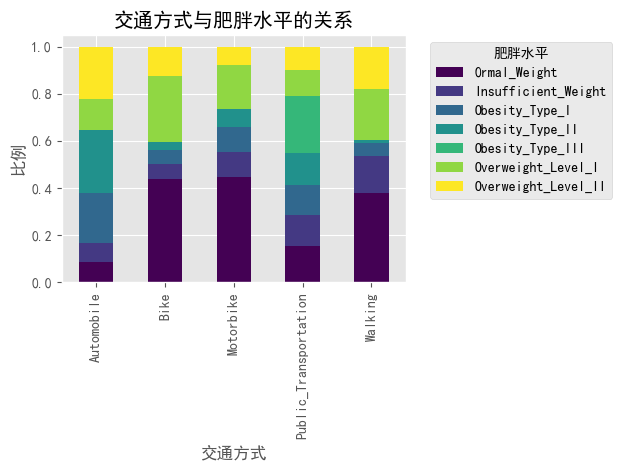

In [40]:
# 交通方式与肥胖水平的关系
plt.figure(figsize=(14, 6))
transport_obesity = pd.crosstab(df['MTRANS'], df['obesity_level'], normalize='index')
transport_obesity.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('交通方式与肥胖水平的关系')
plt.xlabel('交通方式')
plt.ylabel('比例')
plt.legend(title='肥胖水平', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\27514\AppData\Local\Temp\ipykernel_16892\25363885.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='obesity_level', y='FAF', data=df, palette='viridis')


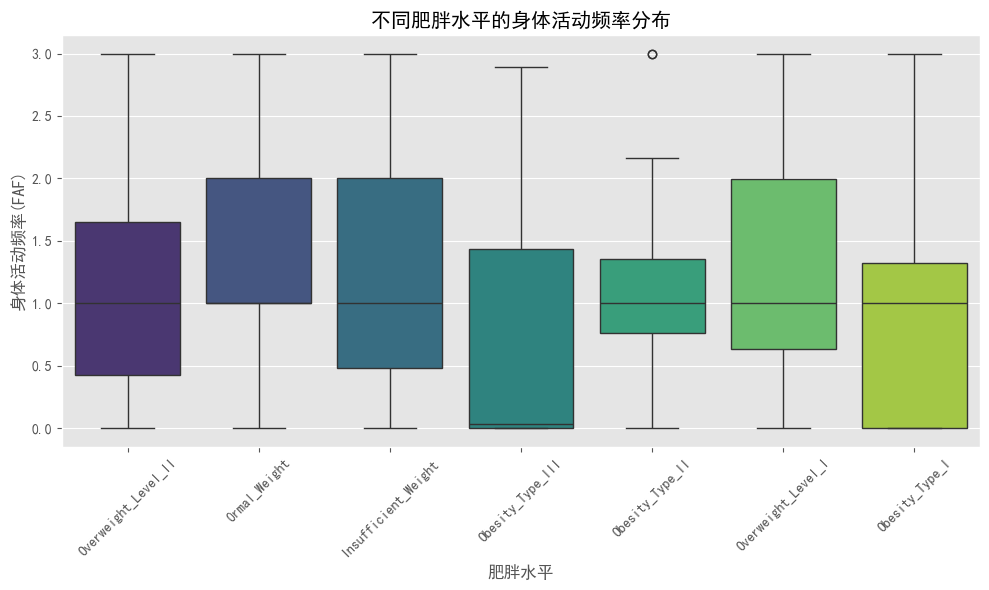

In [41]:
# 身体活动频率(FAF)与肥胖水平的关系
plt.figure(figsize=(10, 6))
sns.boxplot(x='obesity_level', y='FAF', data=df, palette='viridis')
plt.title('不同肥胖水平的身体活动频率分布')
plt.xlabel('肥胖水平')
plt.ylabel('身体活动频率(FAF)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\27514\AppData\Local\Temp\ipykernel_16892\103193530.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='obesity_level', y='CH2O', data=df, palette='viridis')


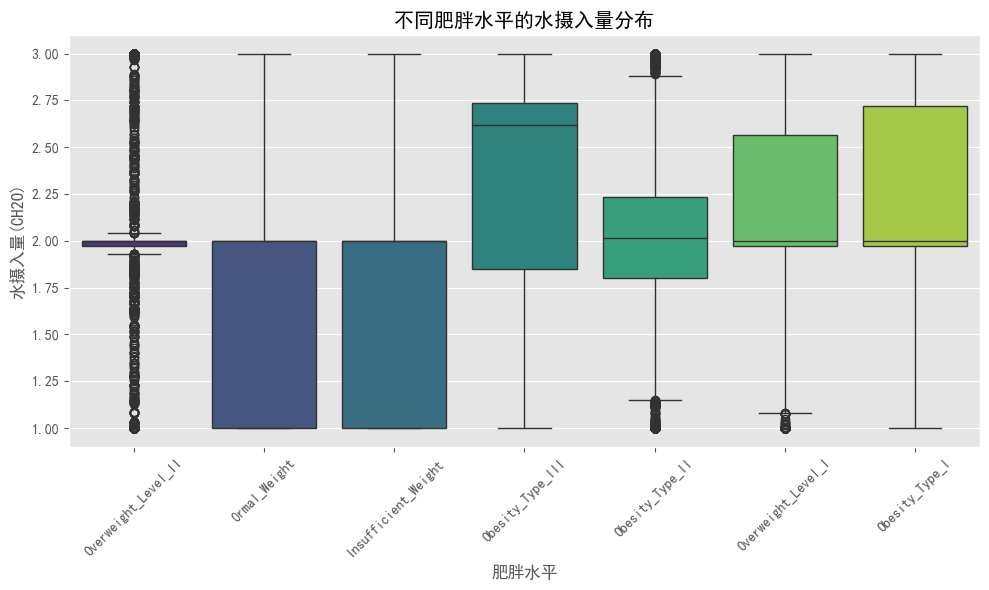

In [42]:
# 水摄入量(CH2O)与肥胖水平的关系
plt.figure(figsize=(10, 6))
sns.boxplot(x='obesity_level', y='CH2O', data=df, palette='viridis')
plt.title('不同肥胖水平的水摄入量分布')
plt.xlabel('肥胖水平')
plt.ylabel('水摄入量(CH2O)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
#2.4分析饮食习惯与肥胖的关系

<Figure size 1200x600 with 0 Axes>

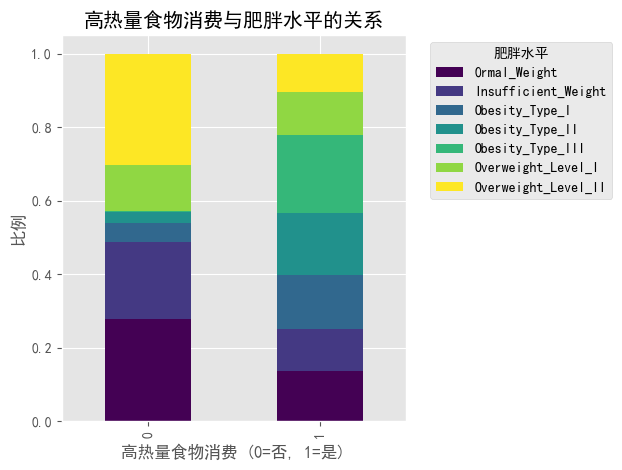

In [44]:
# 高热量食物消费(FAVC)与肥胖水平的关系
plt.figure(figsize=(12, 6))
favc_obesity = pd.crosstab(df['FAVC'], df['obesity_level'], normalize='index')
favc_obesity.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('高热量食物消费与肥胖水平的关系')
plt.xlabel('高热量食物消费 (0=否, 1=是)')
plt.ylabel('比例')
plt.legend(title='肥胖水平', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\27514\AppData\Local\Temp\ipykernel_16892\3244542741.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='obesity_level', y='FCVC', data=df, palette='viridis')


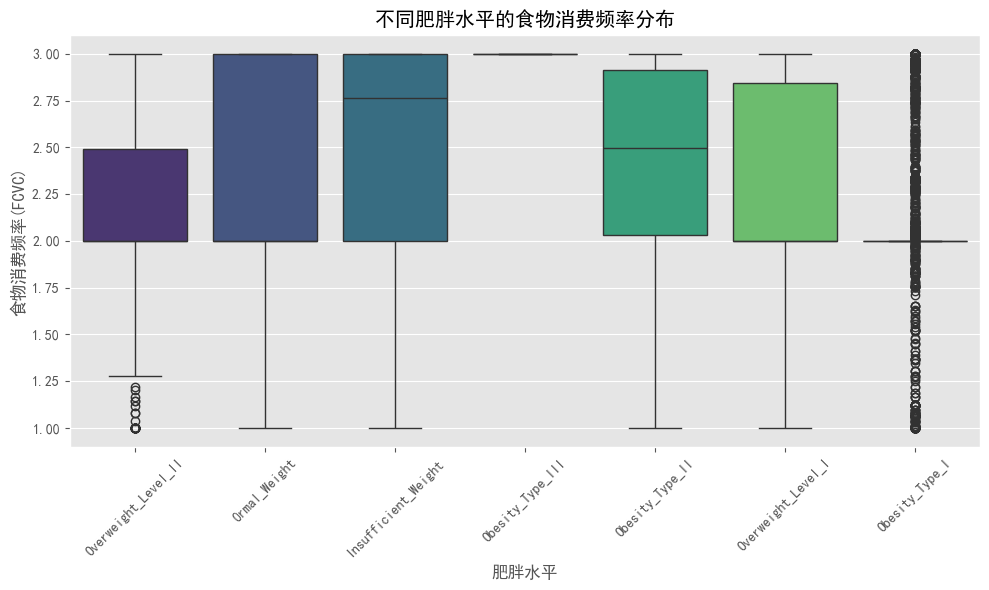

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='obesity_level', y='FCVC', data=df, palette='viridis')
plt.title('不同肥胖水平的食物消费频率分布')
plt.xlabel('肥胖水平')
plt.ylabel('食物消费频率(FCVC)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

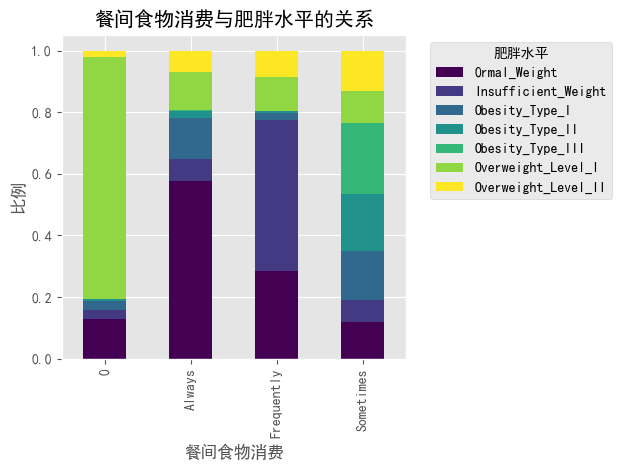

In [46]:
# 餐间食物消费(CAEC)与肥胖水平的关系
plt.figure(figsize=(14, 6))
caec_obesity = pd.crosstab(df['CAEC'], df['obesity_level'], normalize='index')
caec_obesity.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('餐间食物消费与肥胖水平的关系')
plt.xlabel('餐间食物消费')
plt.ylabel('比例')
plt.legend(title='肥胖水平', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\27514\AppData\Local\Temp\ipykernel_16892\269822242.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='obesity_level', y='NCP', data=df, palette='viridis')


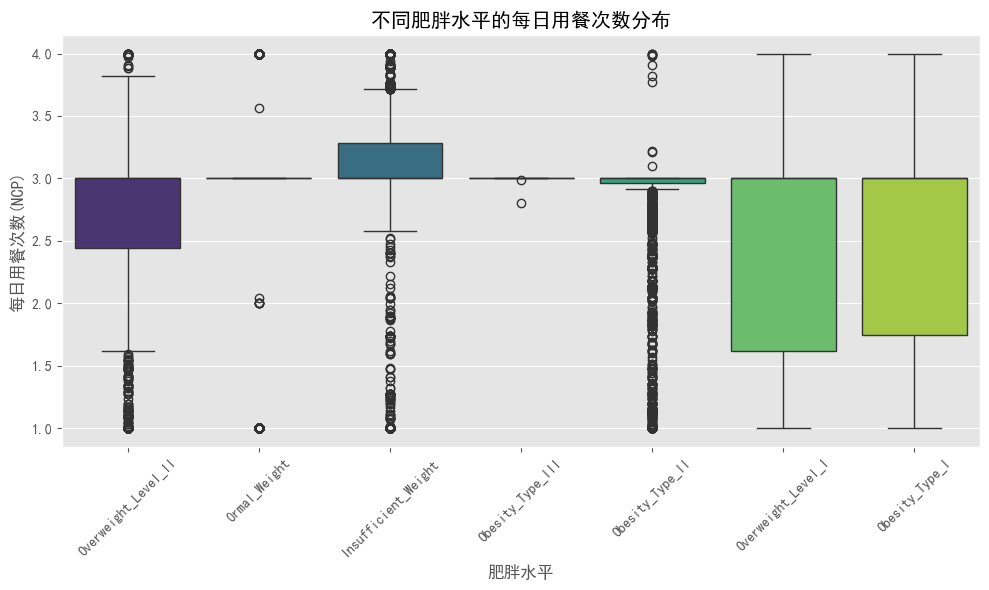

In [47]:
# 每日用餐次数(NCP)与肥胖水平的关系
plt.figure(figsize=(10, 6))
sns.boxplot(x='obesity_level', y='NCP', data=df, palette='viridis')
plt.title('不同肥胖水平的每日用餐次数分布')
plt.xlabel('肥胖水平')
plt.ylabel('每日用餐次数(NCP)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

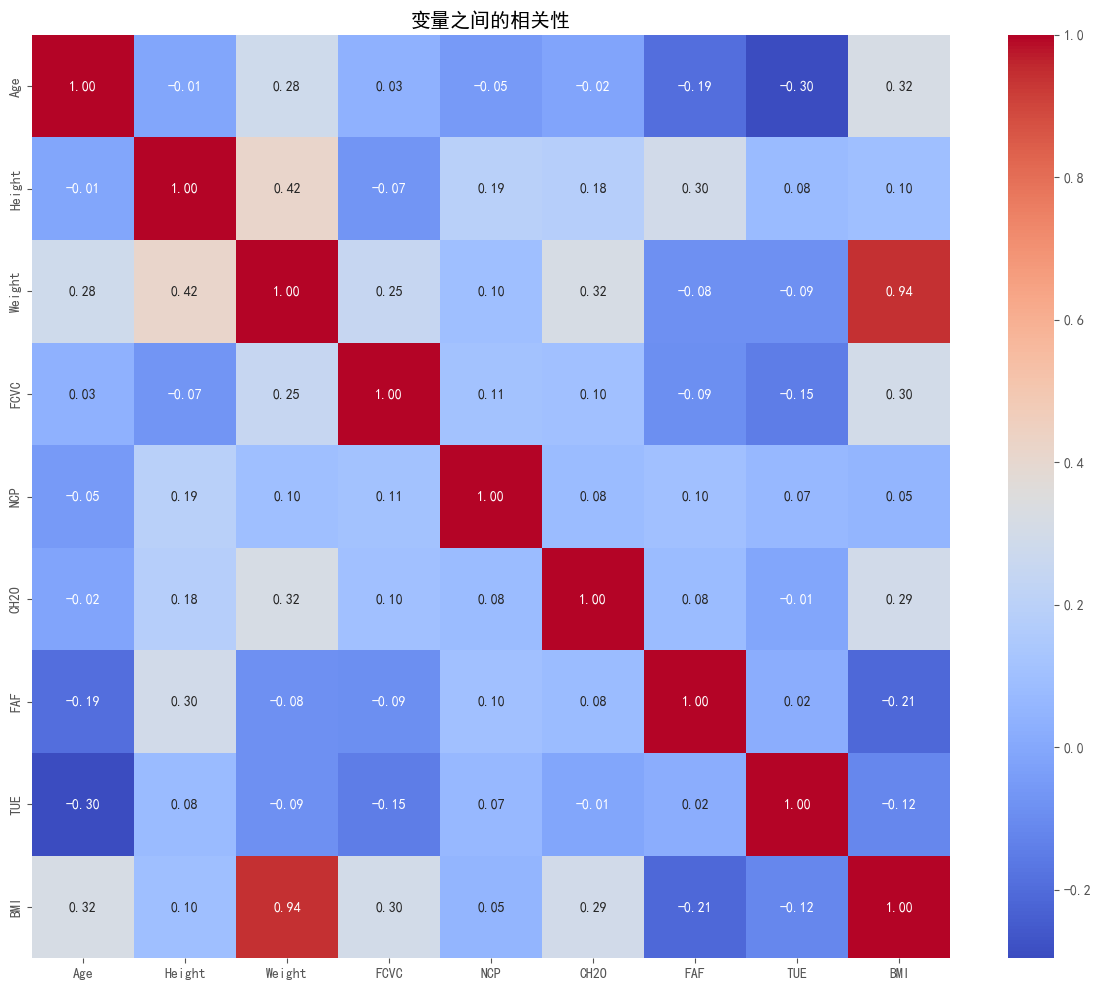

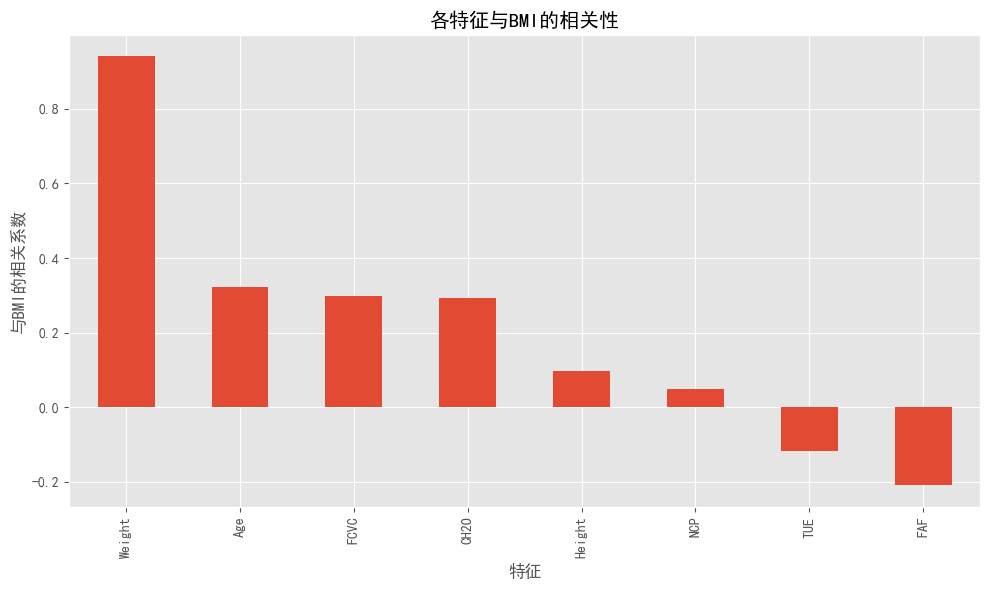

In [48]:
# 选择数值型变量进行相关性分析
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']
correlation = df[numeric_columns].corr()

# 绘制相关性热力图
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('变量之间的相关性')
plt.tight_layout()
plt.show()

# 计算各特征与BMI的相关性并排序
bmi_correlation = correlation['BMI'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
bmi_correlation.drop('BMI').plot(kind='bar')
plt.title('各特征与BMI的相关性')
plt.xlabel('特征')
plt.ylabel('与BMI的相关系数')
plt.tight_layout()
plt.show()

In [49]:
#统计假设检验

In [50]:
#检验家族肥胖史对BMI的影响
family_yes=df[df['family_history_with_overweight']==1]['BMI']
family_no=df[df['family_history_with_overweight']==0]['BMI']
t_stat,p_value=stats.ttest_ind(family_yes,family_no)

In [51]:
print(f"家族肥胖史对BMI的t检验: t={t_stat:.4f}, p={p_value:.4f}")

家族肥胖史对BMI的t检验: t=82.9170, p=0.0000


In [52]:
# 检验不同性别的BMI差异
male_bmi = df[df['Gender'] == 'Male']['BMI']
female_bmi = df[df['Gender'] == 'Female']['BMI']
t_stat, p_value = stats.ttest_ind(male_bmi, female_bmi)
print(f"性别对BMI的t检验: t={t_stat:.4f}, p={p_value:.4f}")

性别对BMI的t检验: t=-13.2349, p=0.0000


In [53]:
# 检验高热量食物消费对BMI的影响
favc_yes = df[df['FAVC'] == 1]['BMI']
favc_no = df[df['FAVC'] == 0]['BMI']
t_stat, p_value = stats.ttest_ind(favc_yes, favc_no)
print(f"高热量食物消费对BMI的t检验: t={t_stat:.4f}, p={p_value:.4f}")


高热量食物消费对BMI的t检验: t=31.7976, p=0.0000


In [54]:
# 检验不同交通方式对BMI的影响 (ANOVA)
transport_groups = [df[df['MTRANS'] == transport]['BMI'] for transport in df['MTRANS'].unique()]
f_stat, p_value = stats.f_oneway(*transport_groups)
print(f"交通方式对BMI的ANOVA检验: F={f_stat:.4f}, p={p_value:.4f}")

交通方式对BMI的ANOVA检验: F=85.8201, p=0.0000


In [55]:
## 1. 饮食习惯与肥胖水平的关系

### 食物消费频率(FCVC)与肥胖水平
#从图1上半部分可以看出，不同肥胖水平人群的食物消费频率存在差异：
#- 体重不足(Insufficient_Weight)和正常体重(Normal_Weight)人群的食物消费频率中位数较高
#- 二级超重(Overweight_Level_II)人群的食物消费频率相对较低
#- 这表明规律、频繁的食物消费可能与健康体重维持有一定关联

### 餐间食物消费(CAEC)与肥胖水平
#图1下半部分的堆叠条形图显示：
#- "0"类别(可能表示不吃零食)的人群中，一级超重(Overweight_Level_I)比例较高 
#- "Always"(总是吃零食)的人群中，体重不足(Insufficient_Weight)的比例明显更高 
#- "Frequently"(经常吃零食)类别中，体重不足和一级肥胖(Obesity_Type_I)人群比例较大 
#- 这表明零食消费模式与体重分类之间存在复杂关系，可能与零食类型和其他生活方式因素交互有关

## 2. 每日用餐次数(NCP)与肥胖水平的关系
#图2的箱线图揭示了重要发现：
#- 体重不足(Insufficient_Weight)人群每日用餐次数明显高于其他类别，中位数接近3.2次
#- 二级肥胖(Obesity_Type_II)和三级肥胖(Obesity_Type_III)人群的用餐次数较为集中，变异性小
#- 一级超重(Overweight_Level_I)和一级肥胖(Obesity_Type_I)人群的用餐次数变异性较大
#- 总体趋势表明，较少的用餐次数可能与较高的肥胖风险相关联，支持"少餐多食"可能导致代谢异常的理论

## 3. 变量之间的相关性分析

#图3的相关性热力图显示了以下重要关系：
#- 体重(Weight)与BMI具有极强的正相关(0.94)，这符合BMI的计算公式
#- 身高(Height)与体重(Weight)呈中等正相关(0.42)
#- 年龄(Age)与体重(0.28)和BMI(0.32)呈中等正相关，表明随年龄增长，体重和BMI有上升趋势
#- 食物消费频率(FCVC)与BMI呈正相关(0.30)，这是一个值得注意的发现
#- 水摄入量(CH2O)与体重(0.32)和BMI(0.29)呈正相关
#- 身体活动频率(FAF)与BMI呈负相关(-0.21)，证实了运动对控制体重的积极作用
#- 技术使用时间(TUE)与BMI呈负相关(-0.12)，这可能反映了久坐行为的影响

## 4. 各特征与BMI的相关性

#图4的条形图清晰展示了各特征与BMI的相关系数：
#- 体重是与BMI相关性最强的特征(接近0.9)，这是预期内的
#- 年龄、食物消费频率(FCVC)和水摄入量(CH2O)与BMI呈中等正相关
#- 身高与BMI呈轻微正相关
#- 每日用餐次数(NCP)与BMI的相关性很小
#- 身体活动频率(FAF)和技术使用时间(TUE)与BMI呈负相关，表明这两个因素可能是降低BMI的保护性因素

## 5. 因素交互作用分析

### 性别和家族肥胖史对BMI的联合影响
#图5上半部分显示：
#- 有家族肥胖史(1)的人群BMI显著高于无家族肥胖史(0)的人群，表明遗传因素对肥胖有强烈影响
#- 在有家族肥胖史的人群中，女性的BMI中位数高于男性
#- 在无家族肥胖史的人群中，男性的BMI中位数高于女性
#- 这表明性别和遗传因素对肥胖风险的影响存在交互作用

### 身体活动频率和高热量食物消费对BMI的联合影响
#图5下半部分揭示：
#- 在所有活动水平中，高热量食物消费者(1)的BMI均高于非消费者(0)
#- 在"低"身体活动组中，高热量食物消费与否对BMI的影响最为显著
#- 对于高热量食物消费者，身体活动水平与BMI之间的关系不太明确
#- 对于非高热量食物消费者，BMI从低活动到中等活动略有增加，而在高活动水平时有所降低
#- 这说明饮食选择(高热量食物消费)对BMI的影响可能大于身体活动水平，但两者结合效应最佳

## 综合分析与关键发现

#1. **遗传因素的重要性**：家族肥胖史是影响BMI的最强预测因素之一，表明肥胖有重要的遗传成分。

#2. **饮食模式的复杂影响**：
 #  - 食物消费频率与BMI呈正相关，但餐间食物消费与肥胖水平的关系较为复杂
 #  - 较低的每日用餐次数与较高的肥胖水平相关联，支持规律进食的重要性

#3. **生活方式因素的作用**：
 #  - 身体活动频率与BMI呈负相关，确认了运动对控制体重的积极作用
 #  - 技术使用时间(可能反映久坐行为)与BMI呈负相关，值得进一步研究

#4. **交互效应的存在**：
 #  - 性别与家族肥胖史存在交互效应，影响BMI表现
 #  - 高热量食物消费与身体活动水平的交互作用影响BMI，表明干预策略应同时考虑饮食和运动

#5. **个体差异**：各肥胖水平组内BMI值的变异性较大，提示除了已分析的因素外，可能还有其他未纳入分析的因素影响体重状况。

#这些发现为第三步的预测模型构建提供了重要基础，也为制定针对性的肥胖预防和干预策略提供了科学依据。特别是，结果强调了同时考虑遗传因素、饮食习惯和身体活动在肥胖管理中的重要性。

In [56]:
#第三步 - 预测模型构建与评估
#第三步目的与必要性
#在完成探索性数据分析后，我们已经初步了解了各个因素与肥胖水平的关系。第三步的预测模型构建与评估旨在：
#量化各因素的影响力：精确衡量各特征对肥胖水平预测的重要性
#构建有效的预测工具：开发能够准确预测个体肥胖风险的模型
#验证先前发现：通过机器学习方法验证EDA中发现的关系是否稳健
#支持决策制定：为肥胖预防和干预策略提供数据驱动的依据
#此步骤对于将分析转化为实际应用至关重要，能够帮助医疗专业人员和个人评估肥胖风险并采取预防措施。

In [57]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib

In [58]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
matplotlib.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.style.use('ggplot')

In [60]:
df=pd.read_csv('obesity_level.csv')
print("数据集的列名：")
print(df.columns.tolist())
print("\n数据集的前五行：")
df.head()

数据集的列名：
['id', 'Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', '0be1dad']

数据集的前五行：


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [62]:
# 创建新的目标变量列，修正拼写问题
# 假设原始目标变量是最后一列
target_col = df.columns[-1]
df['obesity_level'] = df[target_col].str.replace('0rmal_Weight', 'Normal_Weight')

# 计算BMI
df['BMI'] = df['Weight'] / (df['Height'] ** 2)
#准备特征和目标变量
#如果有id列，则移除
if 'id' in df.columns:
    df=df.drop('id',axis=1)
#移除原始目标变量列(如果与新目标变量不同)
if target_col!='obesity_level':
    df=df.drop(target_col,axis=1)
#打印处理后的数据集信息,确保正确
print("\n处理后的数据集形状",df.shape)
print("列名：",df.columns.tolist())


处理后的数据集形状 (20758, 18)
列名： ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'obesity_level', 'BMI']


In [63]:
#特征工程与数据集
#将数据分为特征和目标变量
X=df.drop('obesity_level',axis=1)
y=df['obesity_level']
print("目标变量分布：")
y.value_counts()

目标变量分布：


obesity_level
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [64]:
#对目标变量进行编码
label_encoder=LabelEncoder()
y_encoded=label_encoder.fit_transform(y)


In [66]:
#打印编码映射关系
print("目标变量编码映射")
for i , label in enumerate(label_encoder.classes_):
    print(f"{i}:{label}")

目标变量编码映射
0:Insufficient_Weight
1:Normal_Weight
2:Obesity_Type_I
3:Obesity_Type_II
4:Obesity_Type_III
5:Overweight_Level_I
6:Overweight_Level_II


In [67]:
#识别数值型和分类型特征
numeric_features=X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features=X.select_dtypes(include=['object']).columns.tolist()


In [68]:
#分割训练集和测试集
X_train,X_test,y_train,y_test=train_test_split(
    X,y_encoded,test_size=0.2,random_state=42,stratify=y_encoded
)

In [69]:
print(f"\n训练集大小：{X_train.shape}")


训练集大小：(16606, 17)


In [70]:
#测试集

In [71]:
X_test.shape

(4152, 17)

In [72]:
#构建随机森林模型

In [73]:
#定义预处理步骤
preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numeric_features),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_features)
    ],
    remainder='passthrough'
)

In [74]:
# 创建随机森林模型管道
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [75]:
#训练模型
print("开始训练随机森林模型")
rf_pipeline.fit(X_train,y_train)

开始训练随机森林模型


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'FCVC', 'NCP',
                                                   'SMOKE', 'CH2O', 'SCC',
                                                   'FAF', 'TUE', 'BMI']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'CAEC', 'CALC',
                                                   'MTRANS'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [77]:
#在测试集上面评估模型
y_pred=rf_pipeline.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"随机森林模型准确率:{accuracy:.4f}")

随机森林模型准确率:0.9058


In [79]:
print("分类报告:")
class_names=label_encoder.classes_
print(classification_report(y_test,y_pred,target_names=class_names))

分类报告:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.95      0.94       505
      Normal_Weight       0.89      0.89      0.89       617
     Obesity_Type_I       0.88      0.89      0.88       582
    Obesity_Type_II       0.97      0.97      0.97       650
   Obesity_Type_III       1.00      1.00      1.00       809
 Overweight_Level_I       0.82      0.75      0.78       485
Overweight_Level_II       0.79      0.81      0.80       504

           accuracy                           0.91      4152
          macro avg       0.90      0.90      0.90      4152
       weighted avg       0.91      0.91      0.91      4152



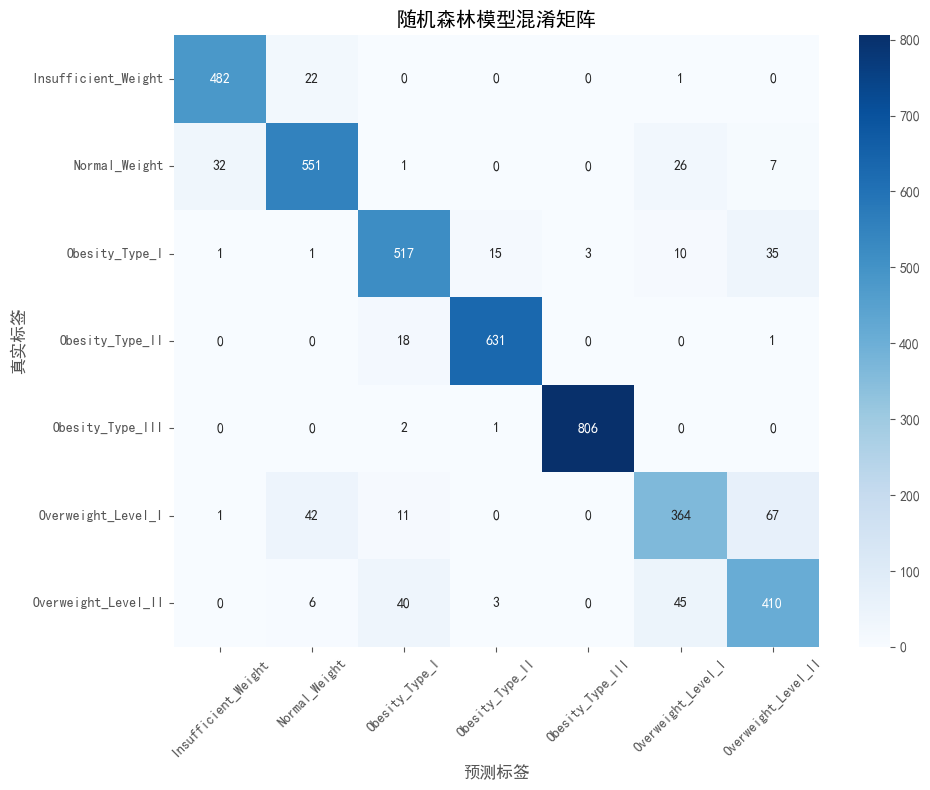

In [80]:
# 绘制混淆矩阵
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)
plt.title('随机森林模型混淆矩阵')
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [81]:
#特征重要性分析


In [83]:
#获取随机森林模型
rf_model=rf_pipeline.named_steps['classifier']
#获取数值特征的名称
#由于分类特征已被独热编码，我们需要提取转换后的特征名称
preprocessor=rf_pipeline.named_steps['preprocessor']
#对X_train应用转化以获取特征名称
X_train_transformed=preprocessor.fit_transform(X_train)
#获取所有特征名称
all_feature_names=[]
#添加数值特征名称
all_feature_names.extend(numeric_features)

In [84]:
#为分类特征添加独热编码后的特征名称
for cat_feature in categorical_features:
    unique_values=X[cat_feature].unique()
    for value in unique_values:
        all_feature_names.append(f"{cat_feature}_{value}")


最重要的15个特征:
                           feature  importance
12                             BMI    0.290048
2                           Weight    0.240299
0                              Age    0.070943
5                             FCVC    0.059383
1                           Height    0.059322
13                     Gender_Male    0.037059
14                   Gender_Female    0.036478
8                             CH2O    0.034551
11                             TUE    0.029297
10                             FAF    0.025744
6                              NCP    0.022202
3   family_history_with_overweight    0.020558
21                 CALC_Frequently    0.011764
19                  CALC_Sometimes    0.009696
17                          CAEC_0    0.009666


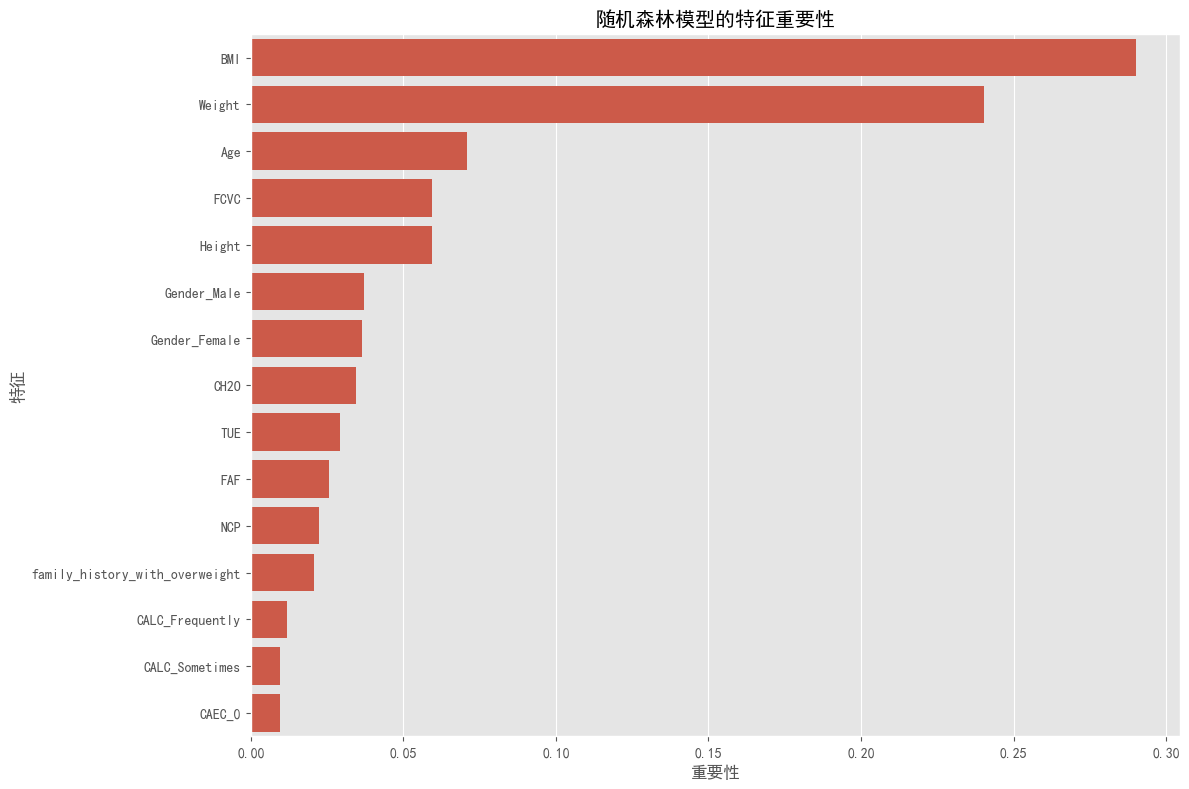


执行5折交叉验证...
交叉验证准确率: 0.9009 ± 0.0049


In [88]:
# 确保特征名称列表长度与特征重要性匹配
if len(all_feature_names) == len(rf_model.feature_importances_):
    # 创建特征重要性DataFrame
    feature_importance = pd.DataFrame({
        'feature': all_feature_names,
        'importance': rf_model.feature_importances_
    })
    
    # 按重要性排序
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    # 显示前15个重要特征
    print("\n最重要的15个特征:")
    print(feature_importance.head(15))
    
    # 绘制特征重要性图
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    sns.barplot(x='importance', y='feature', data=top_features)
    plt.title('随机森林模型的特征重要性')
    plt.xlabel('重要性')
    plt.ylabel('特征')
    plt.tight_layout()
    plt.show()
else:
    # 如果特征名称列表长度不匹配，使用简化方法
    print("\n特征重要性:")
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    print("特征重要性排名:")
    for i in range(min(15, len(importances))):
        print(f"{i+1}. 特征 #{indices[i]}: {importances[indices[i]]:.4f}")
    
    plt.figure(figsize=(12, 8))
    plt.title('特征重要性')
    plt.bar(range(min(15, len(importances))), importances[indices[:15]], align='center')
    plt.xticks(range(min(15, len(importances))), indices[:15])
    plt.xlabel('特征索引')
    plt.ylabel('重要性')
    plt.tight_layout()
    plt.show()

# 计算交叉验证分数
print("\n执行5折交叉验证...")
cv_scores = cross_val_score(rf_pipeline, X, y_encoded, cv=5)
print(f"交叉验证准确率: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

In [89]:
def predict_obesity_risk(model, label_encoder, sample_data):
    """
    使用训练好的模型预测肥胖风险
    
    参数:
    model: 训练好的模型管道
    label_encoder: 用于目标变量编码的LabelEncoder
    sample_data: 包含预测所需特征的DataFrame
    
    返回:
    预测的肥胖水平类别和概率
    """
    # 预测肥胖水平
    predicted_class_encoded = model.predict(sample_data)[0]
    predicted_class = label_encoder.inverse_transform([predicted_class_encoded])[0]
    
    # 预测概率
    probabilities = model.predict_proba(sample_data)[0]
    class_probs = {label_encoder.inverse_transform([i])[0]: prob 
                  for i, prob in enumerate(probabilities)}
    
    return predicted_class, class_probs

# 创建一个示例数据用于预测
# 创建一个函数来更容易地构建示例
def create_sample(age, gender, height, weight, family_history, favc, fcvc, ncp, caec, 
                 smoke, ch2o, scc, faf, tue, calc, mtrans):
    # 计算BMI
    bmi = weight / (height ** 2)
    
    # 创建样本数据框
    sample = pd.DataFrame({
        'Gender': [gender],
        'Age': [age],
        'Height': [height],
        'Weight': [weight],
        'family_history_with_overweight': [family_history],
        'FAVC': [favc],
        'FCVC': [fcvc],
        'NCP': [ncp],
        'CAEC': [caec],
        'SMOKE': [smoke],
        'CH2O': [ch2o],
        'SCC': [scc],
        'FAF': [faf],
        'TUE': [tue],
        'CALC': [calc],
        'MTRANS': [mtrans],
        'BMI': [bmi]
    })
    
    return sample

# 创建三个不同的示例进行比较
print("\n示例预测:")

# 示例1: 健康生活方式
sample1 = create_sample(
    age=30, gender='Female', height=1.65, weight=60, family_history=0,
    favc=0, fcvc=3, ncp=3, caec='Sometimes', smoke=0, ch2o=3, 
    scc=1, faf=3, tue=1, calc='Sometimes', mtrans='Walking'
)
class1, probs1 = predict_obesity_risk(rf_pipeline, label_encoder, sample1)
print("\n示例1: 健康生活方式的30岁女性")
print(f"预测的肥胖水平: {class1}")
print("各类别概率:")
for category, prob in sorted(probs1.items(), key=lambda x: x[1], reverse=True):
    print(f"  {category}: {prob:.4f}")

# 示例2: 不健康生活方式
sample2 = create_sample(
    age=45, gender='Male', height=1.78, weight=95, family_history=1,
    favc=1, fcvc=1, ncp=2, caec='Always', smoke=1, ch2o=1, 
    scc=0, faf=0.5, tue=3, calc='Frequently', mtrans='Automobile'
)
class2, probs2 = predict_obesity_risk(rf_pipeline, label_encoder, sample2)
print("\n示例2: 不健康生活方式的45岁男性")
print(f"预测的肥胖水平: {class2}")
print("各类别概率:")
for category, prob in sorted(probs2.items(), key=lambda x: x[1], reverse=True):
    print(f"  {category}: {prob:.4f}")

# 示例3: 中等生活方式，有家族肥胖史
sample3 = create_sample(
    age=25, gender='Female', height=1.70, weight=70, family_history=1,
    favc=0, fcvc=2, ncp=3, caec='Sometimes', smoke=0, ch2o=2, 
    scc=0, faf=2, tue=2, calc='Sometimes', mtrans='Public_Transportation'
)
class3, probs3 = predict_obesity_risk(rf_pipeline, label_encoder, sample3)
print("\n示例3: 中等生活方式，有家族肥胖史的25岁女性")
print(f"预测的肥胖水平: {class3}")
print("各类别概率:")
for category, prob in sorted(probs3.items(), key=lambda x: x[1], reverse=True):
    print(f"  {category}: {prob:.4f}")


示例预测:

示例1: 健康生活方式的30岁女性
预测的肥胖水平: Normal_Weight
各类别概率:
  Normal_Weight: 0.5400
  Overweight_Level_I: 0.3300
  Overweight_Level_II: 0.1000
  Insufficient_Weight: 0.0200
  Obesity_Type_I: 0.0100
  Obesity_Type_II: 0.0000
  Obesity_Type_III: 0.0000

示例2: 不健康生活方式的45岁男性
预测的肥胖水平: Obesity_Type_I
各类别概率:
  Obesity_Type_I: 0.5000
  Overweight_Level_II: 0.2700
  Obesity_Type_II: 0.0900
  Overweight_Level_I: 0.0800
  Normal_Weight: 0.0600
  Insufficient_Weight: 0.0000
  Obesity_Type_III: 0.0000

示例3: 中等生活方式，有家族肥胖史的25岁女性
预测的肥胖水平: Normal_Weight
各类别概率:
  Normal_Weight: 0.5800
  Overweight_Level_I: 0.2200
  Overweight_Level_II: 0.1600
  Insufficient_Weight: 0.0300
  Obesity_Type_III: 0.0100
  Obesity_Type_I: 0.0000
  Obesity_Type_II: 0.0000
